In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from PIL import Image
import cv2
from skimage.metrics import peak_signal_noise_ratio 

In [5]:
# Specify the image path
image_path = "lena.png"

# Open the image and convert it to grayscale using PIL
image = Image.open(image_path).convert("L")

# Convert the PIL Image to a NumPy array
image_array = np.array(image)

# Display the grayscale image using OpenCV
cv2.imshow('Grayscale Image', image_array)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [54]:
def apply_laplacian(image,
                    laplacian_filter=np.array([[0, -1, 0],
                                 [-1, 4, -1],
                                 [0, -1, 0]])):
    filtered_image = convolve2d(image, laplacian_filter, mode='same')
    
    # Normalize the pixel values to the range [0, 255]
    filtered_image = (filtered_image - np.min(filtered_image)) / (np.max(filtered_image) - np.min(filtered_image))
    filtered_image *= 255
    
    filtered_image = filtered_image.astype(int)
    return filtered_image

filtered_image = apply_laplacian(image)

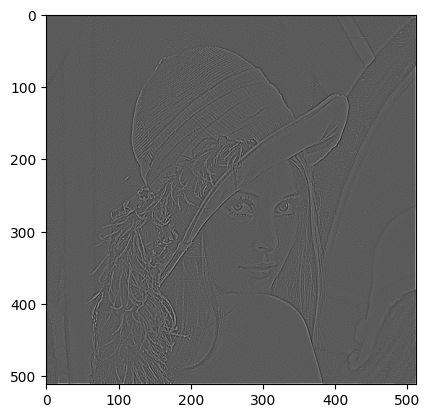

83


In [55]:
plt.imshow(filtered_image, cmap='gray')
plt.show()
print(filtered_image[100][100])

In [56]:
def sharpen(image,filtered_image):
    # Add the filtered image to the original image
    sharpened_image = image + filtered_image

    # Normalize the sharpened image to ensure pixel values are within the range [0, 255]
    sharpened_image = (sharpened_image - np.min(sharpened_image)) / (np.max(sharpened_image) - np.min(sharpened_image))
    sharpened_image *= 255

    # Convert the pixel values to integers
    sharpened_image = sharpened_image.astype(int)

    # Create a figure with two subplots
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Display the original image in the first subplot
    axs[0].imshow(image, cmap='gray')
    axs[0].set_title('Original Image')
    axs[0].axis('off')

    # Display the sharpened image in the second subplot
    axs[1].imshow(sharpened_image, cmap='gray')
    axs[1].set_title('Sharpened Image')
    axs[1].axis('off')

    # Show the figure
    plt.show()

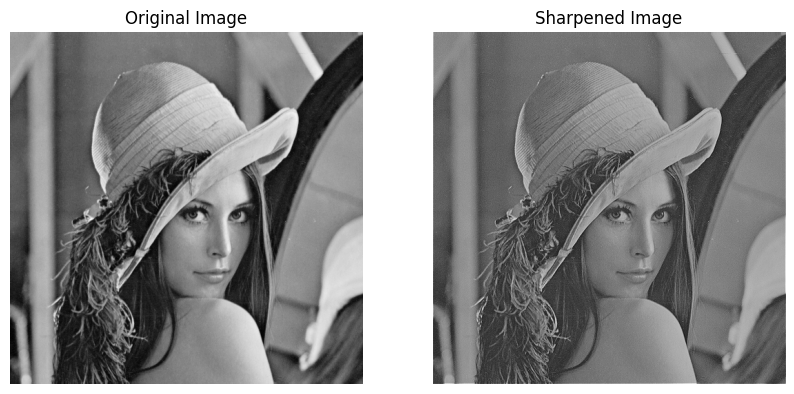

In [57]:
sharpen(image_array,filtered_image)

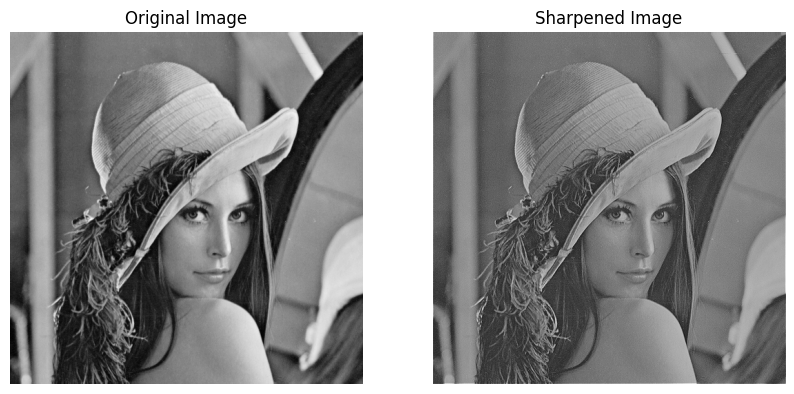

In [58]:
sharpen(image_array,filtered_image)

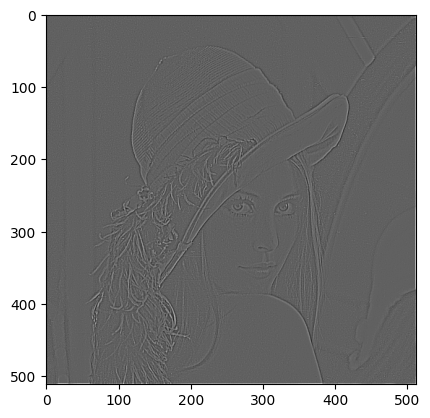

In [59]:
filter2 = np.array([[-1, -1, -1],[-1, 8, -1],[-1, -1, -1]])
filtered_image2=apply_laplacian(image, filter2)
plt.imshow(filtered_image2, cmap='gray')
plt.show()


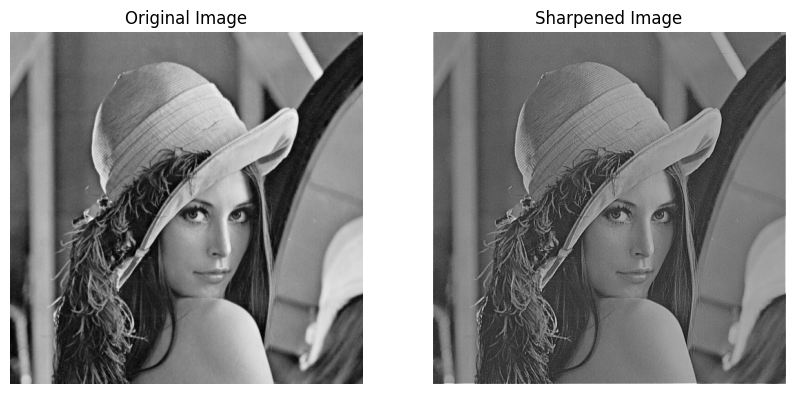

In [60]:
sharpen(image_array,filtered_image2)

In [1]:
import cv2
import numpy as np

In [2]:
def laplacian_filter(image):
    laplacian_mask = np.array([[0, 1, 0],
                               [1, -4, 1],
                               [0, 1, 0]])
    filtered_image = cv2.filter2D(image, -1, laplacian_mask)
    return filtered_image

In [3]:
def sharpen_image(original_image, filtered_image, alpha=1.0):
    sharpened_image = cv2.addWeighted(original_image, 1 + alpha, filtered_image, -alpha, 0)
    return sharpened_image

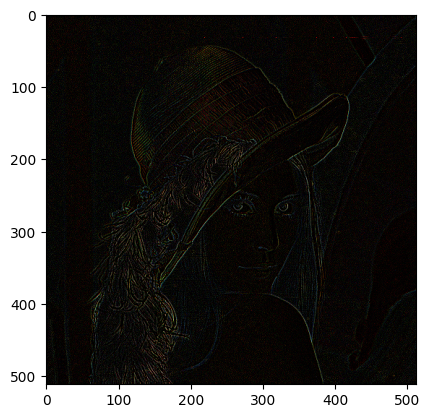

In [9]:
import cv2
if __name__ == "__main__":
    # Read the image
    image = cv2.imread("lena.png")

    # Check if the image is loaded successfully
    if image is None:
        print("Error: Image not found.")
    else:
        # Apply Laplacian filter
        filtered_image = laplacian_filter(image)

        # Blend with the original image to sharpen
        sharpened_image = sharpen_image(image, filtered_image)

        # Display the filtered and sharpened images
        plt.imshow(filtered_image)
        # plt.set_title("Filtered Image")
        # plt.imshow(sharpened_image)
        # plt.set_title("Sharpened Image")


        # Save the filtered and sharpened images
        # plt.imwrite("filtered_image.jpg", filtered_image)
        # plt.imwrite("sharpened_image.jpg", sharpened_image)